## Can we determine who was the most central character?

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('friends_transcripts_clean.csv')

In [4]:
df.head()

,Unnamed: 0,Season,Episode,Title,Character,Line,Clean_Lines
0,0,1,101,The One Where Monica Gets a New Roomate (The P...,Monica,There's nothing to tell! He's just some guy I...,There's nothing to tell! He's just some guy I...
1,1,1,101,The One Where Monica Gets a New Roomate (The P...,Joey,"C'mon, you're going out with the guy! There's...","C'mon, you're going out with the guy! There's..."
2,2,1,101,The One Where Monica Gets a New Roomate (The P...,Chandler,"All right Joey, be nice. So does he have a h...","All right Joey, be nice. So does he have a h..."
3,3,1,101,The One Where Monica Gets a New Roomate (The P...,Phoebe,"Wait, does he eat chalk?","Wait, does he eat chalk?"
4,4,1,101,The One Where Monica Gets a New Roomate (The P...,Phoebe,"Just, 'cause, I don't want her to go through ...","Just, 'cause, I don't want her to go through ..."


In [5]:
df.drop(axis=1, columns=['Unnamed: 0', 'Line'], inplace=True)

In [6]:
df.head()

,Season,Episode,Title,Character,Clean_Lines
0,1,101,The One Where Monica Gets a New Roomate (The P...,Monica,There's nothing to tell! He's just some guy I...
1,1,101,The One Where Monica Gets a New Roomate (The P...,Joey,"C'mon, you're going out with the guy! There's..."
2,1,101,The One Where Monica Gets a New Roomate (The P...,Chandler,"All right Joey, be nice. So does he have a h..."
3,1,101,The One Where Monica Gets a New Roomate (The P...,Phoebe,"Wait, does he eat chalk?"
4,1,101,The One Where Monica Gets a New Roomate (The P...,Phoebe,"Just, 'cause, I don't want her to go through ..."


In [30]:
'Rachel' in test.Clean_Lines.values[8]

True

In [17]:
characters = {'Ross': ['Ross', 'ROSS', 'Ross ', 'Young Ross', 'ross'],
              'Chandler': ['Chandler', 'Chan', 'CHAN', 'CHANDLER', 'chan', 'chandler'],
        'Joey': ['Joey', 'JOEY', 'Fat Joey', 'Joe', 'Jo', 'joey', 'joe', 'jo'],
        'Monica': ['Monica','MNCA', 'MONICA', 'MOnica', 'Young Monica', 'Mon', 'mon', 'monica'],
        'Phoebe': ['French Phoebe', 'PHOE', 'PHOEBE', 'Phoebe', 'Phoebe ', 'Pheebs', 'pheebs', 'phoebe'],
        'Rachel': ['RACH', 'RACHEL', 'Racel', 'Rache', 'Rachel', 'Rachel ', 'Rach', 'rachel', 'rach']}

In [10]:
df_char_matrix = pd.DataFrame(columns=characters.keys())

In [11]:
df_char_matrix

,Ross,Chandler,Joey,Monica,Phoebe,Rachel


In [21]:
for i, line in enumerate(df.Clean_Lines):
    for name in characters.keys():
        for character in characters[name]:
            if character.lower() in line.lower():
                df_char_matrix.loc[i,name] = 1
            else:
                pass

In [22]:
df_char_matrix = df_char_matrix.join(df.Character,how='left')

In [27]:
char_matrix = df_char_matrix.groupby(by='Character', axis=0).sum()
char_matrix

,Ross,Chandler,Joey,Monica,Phoebe,Rachel
Character,,,,,,
Chandler,175,93,312,238,116,101
Joey,324,254,180,169,180,232
Monica,204,309,261,105,264,263
Phoebe,187,159,178,204,90,190
Rachel,516,170,425,317,304,90
Ross,104,169,237,224,190,374


Once you get the results, put them into a matrix to see who says the other person's name the most

Plot via a network X graph 
- directed
- weighted 
- use adjancey matrix
- closeness centrality


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [33]:
char_matrix.reset_index(inplace=True)
char_matrix

,index,Character,Ross,Chandler,Joey,Monica,Phoebe,Rachel
0,0,Chandler,175,93,312,238,116,101
1,1,Joey,324,254,180,169,180,232
2,2,Monica,204,309,261,105,264,263
3,3,Phoebe,187,159,178,204,90,190
4,4,Rachel,516,170,425,317,304,90
5,5,Ross,104,169,237,224,190,374


In [35]:
df_multiplex = pd.melt(char_matrix, id_vars='Character')

In [37]:
df_multi = df_multiplex[6:]

In [39]:
df_multi.head()

,Character,variable,value
6,Chandler,Ross,175
7,Joey,Ross,324
8,Monica,Ross,204
9,Phoebe,Ross,187
10,Rachel,Ross,516


In [38]:
DG = nx.DiGraph()

In [40]:
DG.add_weighted_edges_from(df_multi[['Character', 'variable','value']].values)

In [42]:
DG.name = 'Friends Directed Graph'

In [43]:
print(nx.info(DG))

Name: Friends Directed Graph
Type: DiGraph
Number of nodes: 6
Number of edges: 36
Average in degree:   6.0000
Average out degree:   6.0000


In [45]:
from matplotlib import cm

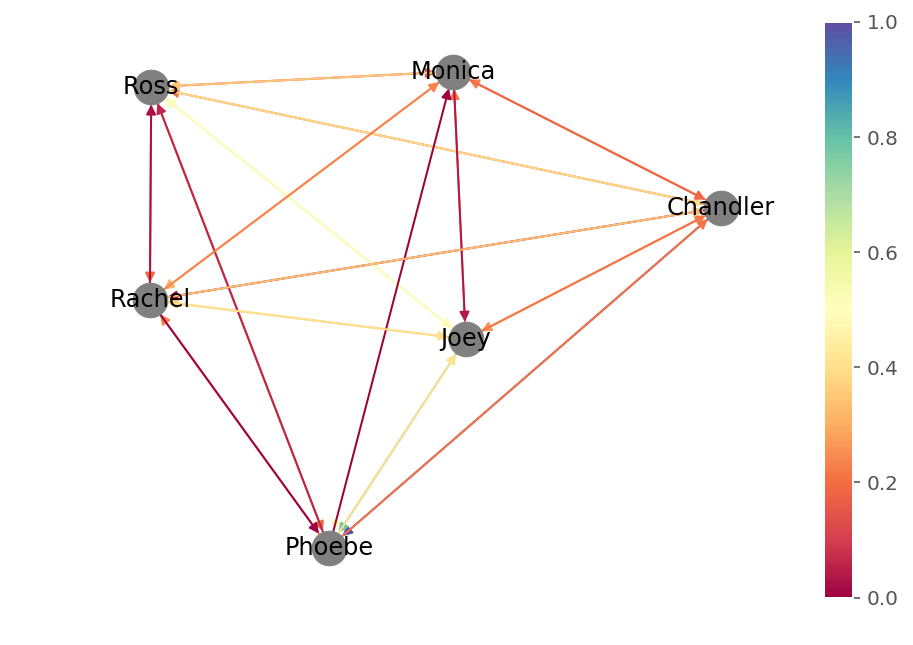

In [51]:
positions = nx.circular_layout(DG)
cmap_edges = cm.get_cmap('Spectral')
edge_weights = df_multi.value.values

nx.draw_spring(DG,node_color='grey',with_labels=True,
        edge_color=edge_weights,edge_cmap=cmap_edges)

# code for adding a colour bar, colour range normalised to [0,1]
vmin = 0
vmax = 1
sm = plt.cm.ScalarMappable(cmap=cmap_edges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm)

plt.show()

In [61]:
nx.edge_betweenness_centrality(DG)

{('Chandler', 'Ross'): 0.03333333333333333,
 ('Chandler', 'Chandler'): 0.0,
 ('Chandler', 'Joey'): 0.03333333333333333,
 ('Chandler', 'Monica'): 0.03333333333333333,
 ('Chandler', 'Phoebe'): 0.03333333333333333,
 ('Chandler', 'Rachel'): 0.03333333333333333,
 ('Ross', 'Ross'): 0.0,
 ('Ross', 'Chandler'): 0.03333333333333333,
 ('Ross', 'Joey'): 0.03333333333333333,
 ('Ross', 'Monica'): 0.03333333333333333,
 ('Ross', 'Phoebe'): 0.03333333333333333,
 ('Ross', 'Rachel'): 0.03333333333333333,
 ('Joey', 'Ross'): 0.03333333333333333,
 ('Joey', 'Chandler'): 0.03333333333333333,
 ('Joey', 'Joey'): 0.0,
 ('Joey', 'Monica'): 0.03333333333333333,
 ('Joey', 'Phoebe'): 0.03333333333333333,
 ('Joey', 'Rachel'): 0.03333333333333333,
 ('Monica', 'Ross'): 0.03333333333333333,
 ('Monica', 'Chandler'): 0.03333333333333333,
 ('Monica', 'Joey'): 0.03333333333333333,
 ('Monica', 'Monica'): 0.0,
 ('Monica', 'Phoebe'): 0.03333333333333333,
 ('Monica', 'Rachel'): 0.03333333333333333,
 ('Phoebe', 'Ross'): 0.03333

In [54]:
DG.edges(data=True)

OutEdgeDataView([('Chandler', 'Ross', {'weight': 175}), ('Chandler', 'Chandler', {'weight': 93}), ('Chandler', 'Joey', {'weight': 312}), ('Chandler', 'Monica', {'weight': 238}), ('Chandler', 'Phoebe', {'weight': 116}), ('Chandler', 'Rachel', {'weight': 101}), ('Ross', 'Ross', {'weight': 104}), ('Ross', 'Chandler', {'weight': 169}), ('Ross', 'Joey', {'weight': 237}), ('Ross', 'Monica', {'weight': 224}), ('Ross', 'Phoebe', {'weight': 190}), ('Ross', 'Rachel', {'weight': 374}), ('Joey', 'Ross', {'weight': 324}), ('Joey', 'Chandler', {'weight': 254}), ('Joey', 'Joey', {'weight': 180}), ('Joey', 'Monica', {'weight': 169}), ('Joey', 'Phoebe', {'weight': 180}), ('Joey', 'Rachel', {'weight': 232}), ('Monica', 'Ross', {'weight': 204}), ('Monica', 'Chandler', {'weight': 309}), ('Monica', 'Joey', {'weight': 261}), ('Monica', 'Monica', {'weight': 105}), ('Monica', 'Phoebe', {'weight': 264}), ('Monica', 'Rachel', {'weight': 263}), ('Phoebe', 'Ross', {'weight': 187}), ('Phoebe', 'Chandler', {'weight